In [ ]:
pip install qiskit qiskit-aer qiskit_ibm_runtime pylatexenc matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 5.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 57.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 77.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 63.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.9/363.9 kB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 57.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.8/75.8 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.5/130.5 kB 8.6 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256

#  Deutsch-Jozsa algorithm


In [ ]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

# --- Parameters ---
n = 5
shots = 1024

# --- Oracle Definitions ---
def create_constant_oracle_0(n):
    oracle = QuantumCircuit(n + 1)
    return oracle

def create_constant_oracle_1(n):
    oracle = QuantumCircuit(n + 1)
    oracle.x(n)
    return oracle

def create_balanced_oracle(n):
    oracle = QuantumCircuit(n + 1)
    for i in range(n):
        oracle.cx(i,n)
    return oracle

# --- Deutsch-Jozsa Circuit Builder ---
def create_dj_circuit(n, oracle):
    circuit = QuantumCircuit(n + 1, n)

    # Initialize input qubits to |+> and output to |->
    for i in range(n):
        circuit.h(i)
    circuit.x(n)
    circuit.h(n)

    circuit.barrier()

    # Apply the oracle
    circuit.compose(oracle, inplace=True)
    circuit.barrier()

    # Apply Hadamard to input qubits again
    for i in range(n):
        circuit.h(i)

    circuit.barrier()

    # Measure input qubits
    circuit.measure(range(n), range(n))

    return circuit

# --- Run and Plot Results ---
def run_and_plot(oracle_func, label):
    oracle = oracle_func(n)
    circuit = create_dj_circuit(n, oracle)

    simulator = Aer.get_backend('qasm_simulator')
    compiled_circuit = transpile(circuit, simulator)
    result = simulator.run(compiled_circuit, shots=shots).result()
    counts = result.get_counts()

    print(f"\n--- {label} Oracle Results ---")
    print("Measurement Counts:", counts)
    print("Inside Oracle:\n",oracle)

# --- Run all tests ---
run_and_plot(create_constant_oracle_0, "Constant Oracle f(x)=0")
run_and_plot(create_constant_oracle_1, "Constant Oracle f(x)=1")
run_and_plot(create_balanced_oracle, "Balanced Oracle f(x)=x1⊕x2⊕...⊕xn")



--- Constant Oracle f(x)=0 Oracle Results ---
Measurement Counts: {'00000': 1024}
Inside Oracle:
      
q_0: 
     
q_1: 
     
q_2: 
     
q_3: 
     
q_4: 
     
q_5: 
     

--- Constant Oracle f(x)=1 Oracle Results ---
Measurement Counts: {'00000': 1024}
Inside Oracle:
           
q_0: ─────
          
q_1: ─────
          
q_2: ─────
          
q_3: ─────
          
q_4: ─────
     ┌───┐
q_5: ┤ X ├
     └───┘

--- Balanced Oracle f(x)=x1⊕x2⊕...⊕xn Oracle Results ---
Measurement Counts: {'11111': 1024}
Inside Oracle:
                               
q_0: ──■──────────────────────
       │                      
q_1: ──┼────■─────────────────
       │    │                 
q_2: ──┼────┼────■────────────
       │    │    │            
q_3: ──┼────┼────┼────■───────
       │    │    │    │       
q_4: ──┼────┼────┼────┼────■──
     ┌─┴─┐┌─┴─┐┌─┴─┐┌─┴─┐┌─┴─┐
q_5: ┤ X ├┤ X ├┤ X ├┤ X ├┤ X ├
     └───┘└───┘└───┘└───┘└───┘


# Deutsch-Jozsa algorithm code form GitHub

In [ ]:
"""
This module implements the Deutsch-Jozsa algorithm using Qiskit.
"""
import numpy as np
from qiskit_aer import Aer
from qiskit import QuantumCircuit, transpile
from qiskit.circuit.instruction import Instruction


class DJAlgorithm:
    """This class implements the Deutsch-Jozsa algorithm."""

    @staticmethod
    def simulate(oracle_block: QuantumCircuit) -> dict:
        """
        Run the Deutsch-Jozsa algorithm on the simulator.

        :param oracle_block: The oracle block to check with Deutsch-Jozsa algorithm.
        :return: The result of the algorithm as dictionary. Check "result" and "counts".
        """
        circuit = DJAlgorithm._construct_the_circuit(oracle_block)
        aer_sim = Aer.get_backend("aer_simulator")
        transpiled_dj_circuit = transpile(circuit, aer_sim)
        results = aer_sim.run(transpiled_dj_circuit).result()
        answer = results.get_counts()

        # Display measurement counts (bitstrings and their frequency)
        print("\n--- Measurement Results ---")
        for key, val in sorted(answer.items()):
            print(f"{key} → {val} shots")

        # Determine if constant or balanced
        num_input_qubits = circuit.num_qubits - 1
        if "0" * num_input_qubits in answer:
            result_type = "Constant"
        else:
            result_type = "Balanced"

        print(f"\nResult: {result_type}")
        return {"result": result_type, "counts": answer}

    @staticmethod
    def give_a_balanced_function(inputs_count: int) -> Instruction:
        """Returns a balanced oracle function.

        :param inputs_count: The number of input qubits.
        :return: The balanced oracle function as Instruction.
        """
        oracle = QuantumCircuit(inputs_count + 1)

        # Balanced function: Flip output qubit if first input qubit is 1
        oracle.cx(0, inputs_count)
        print(oracle)
        inst = oracle.to_instruction()
        inst.name = "BalancedOracle"
        return inst

    @staticmethod
    def give_a_constant_function(inputs_count: int) -> Instruction:
        """Returns a constant oracle function.

        :param inputs_count: The number of input qubits.
        :return: The constant oracle function as Instruction.
        """
        oracle = QuantumCircuit(inputs_count + 1)

        # Randomly pick f(x) = 0 or f(x) = 1
        if np.random.randint(2) == 1:
            oracle.x(inputs_count)  # Flip output qubit if f(x) = 1
        print(oracle)
        inst = oracle.to_instruction()
        inst.name = "ConstantOracle"
        return inst

    @staticmethod
    def _construct_the_circuit(function_block: Instruction) -> QuantumCircuit:
        """Creates the Deutsch-Jozsa circuit.

        :param function_block: The oracle Instruction to check.
        :return: The circuit for the Deutsch-Jozsa algorithm.
        """
        input_length = function_block.num_qubits - 1
        _circuit = QuantumCircuit(input_length + 1, input_length)

        # Step 1: Initialize input qubits to |0> and output to |1>
        for qubit in range(input_length):
            _circuit.h(qubit)
        _circuit.x(input_length)
        _circuit.h(input_length)
        _circuit.barrier()

        # Step 2: Apply oracle
        _circuit.append(function_block, range(function_block.num_qubits), [])
        _circuit.barrier()

        # Step 3: Apply Hadamards again to input qubits
        for qubit in range(input_length):
            _circuit.h(qubit)
        _circuit.barrier()

        # Step 4: Measure input qubits
        for qubit in range(input_length):
            _circuit.measure(qubit, qubit)

        return _circuit


# --- Entry point ---
if __name__ == "__main__":
    print("===================================")
    print(" Deutsch-Jozsa Algorithm Simulation")
    print("===================================")

    try:
        inputs_count = int(input("> Enter the number of input qubits: "))
        oracle_type = input("> Enter the type of function (c)onstant/(b)alanced: ").lower()

        if oracle_type in ["constant", "c"]:
            block_to_test = DJAlgorithm.give_a_constant_function(inputs_count)
        elif oracle_type in ["balanced", "b"]:
            block_to_test = DJAlgorithm.give_a_balanced_function(inputs_count)
        else:
            print("Invalid function type.")
            exit(1)

        # Run and display result
        result = DJAlgorithm.simulate(block_to_test)

    except ValueError:
        print("Invalid input. Please enter an integer for the number of qubits.")
    except Exception as e:
        print(f"An error occurred: {e}")


 Deutsch-Jozsa Algorithm Simulation
> Enter the number of input qubits: 3
> Enter the type of function (c)onstant/(b)alanced: c
     
q_0: 
     
q_1: 
     
q_2: 
     
q_3: 
     

--- Measurement Results ---
000 → 1024 shots

Result: Constant


# Deutsch circuit with 2 qubits and 1 classical bit

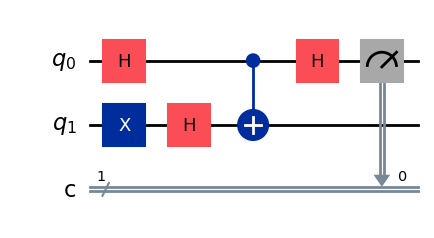

In [ ]:
from qiskit import QuantumCircuit
from qiskit.visualization import plot_circuit_layout
from matplotlib import pyplot as plt

# Create a Deutsch circuit with 2 qubits and 1 classical bit for the input qubit
qc = QuantumCircuit(2, 1)

# Step 1: Initial state |ψ₀⟩ = |0⟩|1⟩
qc.x(1)              # Set output qubit to |1⟩
qc.h([0, 1])         # Apply Hadamard to both qubits — state |ψ₂⟩

# Step 2: Oracle (example: balanced function f(x) = x)
# Implement Uf: flip output if input is 1 → CNOT with control on qubit 0
qc.cx(0, 1)

# Step 3: Apply H to input qubit again
qc.h(0)

# Step 4: Measure the input qubit
qc.measure(0, 0)

# Display circuit diagram using matplotlib
# Change 'mlp' to 'mpl' to use the Matplotlib output backend
qc.draw(output='mpl')

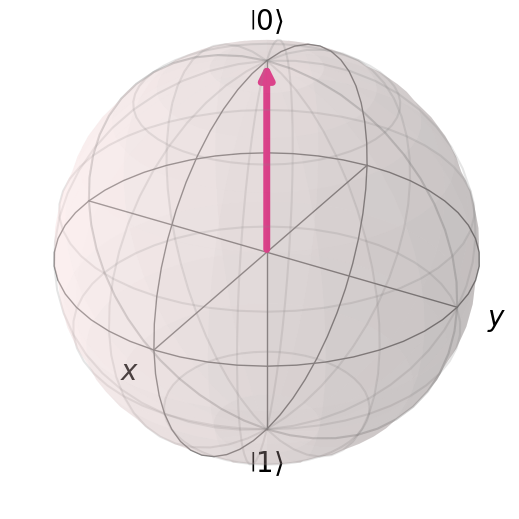

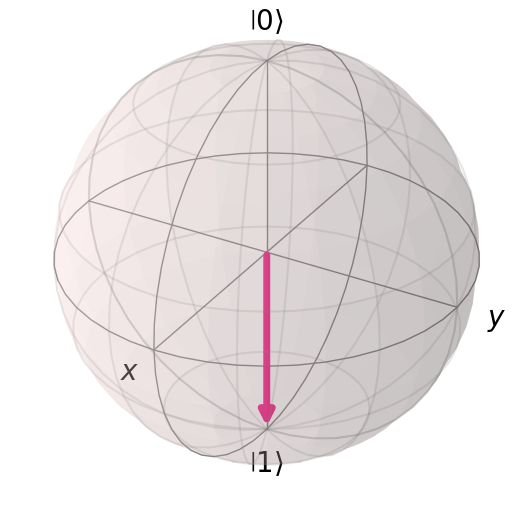

In [ ]:
from qiskit.visualization.bloch import Bloch
import matplotlib.pyplot as plt

# Create Bloch spheres manually for |0⟩ and |1⟩

# --- |0⟩ State ---
bloch_0 = Bloch()
bloch_0.add_vectors([0, 0, 1])  # |0⟩ is at north pole
bloch_0.title = "|0⟩ state"
bloch_0.show()

# --- |1⟩ State ---
bloch_1 = Bloch()
bloch_1.add_vectors([0, 0, -1])  # |1⟩ is at south pole
bloch_1.title = "|1⟩ state"
bloch_1.show()


# Create Unitary Gate

In [ ]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer

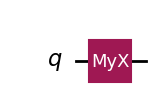

In [ ]:
from qiskit.circuit.library import UnitaryGate
import numpy as np

# Example: a custom 2x2 unitary matrix
custom_unitary = np.array([[0, 1],
                           [1, 0]])  # This is actually the X gate

# Create a gate object
gate = UnitaryGate(custom_unitary, label="MyX")

# Use in a circuit
from qiskit import QuantumCircuit
qc = QuantumCircuit(1)
qc.append(gate, [0])
qc.draw('mpl')


# Bell State & Entalgement Code

In [ ]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

# Create a Bell state circuit (2-qubit entanglement)
qc = QuantumCircuit(2, 2)
qc.h(0)            # Put qubit 0 into superposition
qc.cx(0, 1)        # Entangle qubit 0 and 1
qc.measure([0, 1], [0, 1])  # Measure both qubits

# Simulate the circuit
simulator = Aer.get_backend('qasm_simulator')
compiled_circuit = transpile(qc, simulator)
job = simulator.run(compiled_circuit, shots=1024)
result = job.result()

# Extract counts (ensure this is NOT empty)
counts = result.get_counts(compiled_circuit)

# Debug print
print("Measurement outcomes:", counts)

print(qc)

Measurement outcomes: {'11': 503, '00': 521}
     ┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1 


# Berstine vezarani code

In [ ]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

sk=(input("Enter your secreat key: "))
n=(len(sk))

def createOracle(sk):
  oracle=QuantumCircuit(n+1)
  for i in range(n):
    if sk[i]=='1':
      oracle.cx(i,n)
  print(oracle)
  return oracle

def createCircuit(bvc,sk):
  for i in range(n):
    bvc.h(i)

  bvc.x(n)
  bvc.h(n)

  bvc.barrier()

  oracle=createOracle(sk)
  bvc.compose(oracle,inplace=True)

  bvc.barrier()
  for i in range(n):
    bvc.h(i)

  bvc.measure(range(n),range(n))
  return bvc

bvc=QuantumCircuit(n+1,n)
bvc=createCircuit(bvc,sk)

simulator=Aer.get_backend('qasm_simulator')
compiled_circuit=transpile(bvc,simulator)
result=simulator.run(compiled_circuit,shots=1024).result()
counts=result.get_counts(compiled_circuit)

print(counts)
print(bvc)

Enter your secreat key: 10101
                    
q_0: ──■────────────
       │            
q_1: ──┼────────────
       │            
q_2: ──┼────■───────
       │    │       
q_3: ──┼────┼───────
       │    │       
q_4: ──┼────┼────■──
     ┌─┴─┐┌─┴─┐┌─┴─┐
q_5: ┤ X ├┤ X ├┤ X ├
     └───┘└───┘└───┘
{'10101': 1024}
     ┌───┐      ░                 ░ ┌───┐┌─┐            
q_0: ┤ H ├──────░───■─────────────░─┤ H ├┤M├────────────
     ├───┤      ░   │             ░ ├───┤└╥┘┌─┐         
q_1: ┤ H ├──────░───┼─────────────░─┤ H ├─╫─┤M├─────────
     ├───┤      ░   │             ░ ├───┤ ║ └╥┘┌─┐      
q_2: ┤ H ├──────░───┼────■────────░─┤ H ├─╫──╫─┤M├──────
     ├───┤      ░   │    │        ░ ├───┤ ║  ║ └╥┘┌─┐   
q_3: ┤ H ├──────░───┼────┼────────░─┤ H ├─╫──╫──╫─┤M├───
     ├───┤      ░   │    │        ░ ├───┤ ║  ║  ║ └╥┘┌─┐
q_4: ┤ H ├──────░───┼────┼────■───░─┤ H ├─╫──╫──╫──╫─┤M├
     ├───┤┌───┐ ░ ┌─┴─┐┌─┴─┐┌─┴─┐ ░ └───┘ ║  ║  ║  ║ └╥┘
q_5: ┤ X ├┤ H ├─░─┤ X ├┤ X ├┤ X ├─░───────╫──╫──╫──╫──

# code for Decition Tree

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("drug200.csv")  # Change to your file path

# Encode categorical columns
label_encoders = {}
for col in ['Sex', 'BP', 'Cholesterol', 'Drug']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Features and target
X = df[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']]
y = df['Drug']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train decision tree
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Evaluate
y_pred = clf.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))

# Plot the tree
plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=X.columns, class_names=label_encoders['Drug'].classes_, filled=True)
plt.show()


# code for Quantum Dection Tree

In [ ]:
import pennylane as qml
from pennylane import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Load dataset
df = pd.read_csv("drug200.csv")

# Encode categorical features
for col in ['Sex', 'BP', 'Cholesterol', 'Drug']:
    df[col] = LabelEncoder().fit_transform(df[col])

X = df[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].to_numpy()
y = df['Drug'].to_numpy()

# Normalize features to [0, π]
X = np.pi * (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Quantum Circuit
n_qubits = X.shape[1]
dev = qml.device("default.qubit", wires=n_qubits)

@qml.qnode(dev)
def quantum_node(x, weights):
    for i in range(n_qubits):
        qml.RY(x[i], wires=i)
    for i in range(n_qubits):
        qml.RY(weights[i], wires=i)
    return qml.expval(qml.PauliZ(0))  # Simple decision via sign

# Trainable weights (one per feature)
weights = np.random.randn(n_qubits, requires_grad=True)

# Simple training loop (depth-1 quantum decision)
opt = qml.GradientDescentOptimizer(stepsize=0.1)

epochs = 20
for epoch in range(epochs):
    def cost(w):
        loss = 0
        for xi, yi in zip(X_train, y_train):
            pred = quantum_node(xi, w)
            pred_class = int(pred < 0)
            loss += (pred_class - yi) ** 2
        return loss / len(X_train)


# Evaluate
preds = []
for xi in X_test:
    p = quantum_node(xi, weights)
    preds.append(int(p < 0))

print("\nClassification Report:")
print(classification_report(y_test, preds))


# compairing the QSVM and SVM

In [ ]:

# Quantum SVM vs Classical SVM Comparison on Iris Dataset
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Quantum computing libraries
try:
    from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
    from qiskit_aer import Aer
    from qiskit.circuit.library import ZZFeatureMap, RealAmplitudes
    from qiskit_machine_learning.algorithms import QSVC
    from qiskit_machine_learning.kernels import QuantumKernel
    QISKIT_AVAILABLE = True
except ImportError:
    QISKIT_AVAILABLE = False
    print("Qiskit not available. Installing qiskit and qiskit-machine-learning is required for QSVM.")

# Alternative implementation using PennyLane (if Qiskit not available)
try:
    import pennylane as qml
    PENNYLANE_AVAILABLE = True
except ImportError:
    PENNYLANE_AVAILABLE = False

class QuantumSVM:
    """
    Quantum SVM implementation using quantum kernel methods
    """
    def __init__(self, num_qubits=4, shots=1024):
        self.num_qubits = num_qubits
        self.shots = shots
        self.trained = False

    def quantum_kernel(self, x1, x2):
        """
        Compute quantum kernel between two data points
        """
        if QISKIT_AVAILABLE:
            return self._qiskit_kernel(x1, x2)
        elif PENNYLANE_AVAILABLE:
            return self._pennylane_kernel(x1, x2)
        else:
            # Fallback to classical RBF kernel with quantum-inspired modifications
            return self._classical_quantum_inspired_kernel(x1, x2)

    def _qiskit_kernel(self, x1, x2):
        """Qiskit implementation of quantum kernel"""
        feature_map = ZZFeatureMap(feature_dimension=len(x1), reps=2)
        quantum_kernel = QuantumKernel(feature_map=feature_map)
        return quantum_kernel.evaluate(x1.reshape(1, -1), x2.reshape(1, -1))[0, 0]

    def _pennylane_kernel(self, x1, x2):
        """PennyLane implementation of quantum kernel"""
        dev = qml.device('default.qubit', wires=self.num_qubits)

        @qml.qnode(dev)
        def kernel_circuit(x1, x2):
            # Encode first data point
            for i in range(min(len(x1), self.num_qubits)):
                qml.RY(x1[i], wires=i)
                qml.RZ(x1[i], wires=i)

            # Entangling gates
            for i in range(self.num_qubits - 1):
                qml.CNOT(wires=[i, i + 1])

            # Encode second data point (inverse)
            for i in range(min(len(x2), self.num_qubits)):
                qml.RY(-x2[i], wires=i)
                qml.RZ(-x2[i], wires=i)

            # Inverse entangling gates
            for i in range(self.num_qubits - 1):
                qml.CNOT(wires=[i, i + 1])

            return qml.probs(wires=0)

        probs = kernel_circuit(x1, x2)
        return probs[0]  # Probability of measuring |0⟩

    def _classical_quantum_inspired_kernel(self, x1, x2):
        """Classical kernel inspired by quantum interference patterns"""
        # Simulate quantum-like interference using trigonometric functions
        diff = x1 - x2
        phase = np.sum(diff ** 2)
        interference = np.cos(phase) * np.exp(-0.5 * phase)
        return abs(interference)

    def fit(self, X, y):
        """Train the quantum SVM"""
        self.X_train = X
        self.y_train = y

        # Compute kernel matrix
        n_samples = X.shape[0]
        self.K = np.zeros((n_samples, n_samples))

        print("Computing quantum kernel matrix...")
        for i in range(n_samples):
            for j in range(n_samples):
                self.K[i, j] = self.quantum_kernel(X[i], X[j])
            if (i + 1) % 10 == 0:
                print(f"Processed {i + 1}/{n_samples} samples")

        # Use classical SVM with precomputed kernel
        self.svm = SVC(kernel='precomputed', C=1.0)
        self.svm.fit(self.K, y)
        self.trained = True

    def predict(self, X_test):
        """Predict using quantum SVM"""
        if not self.trained:
            raise ValueError("Model must be trained first")

        # Compute kernel matrix between test and training data
        n_test = X_test.shape[0]
        n_train = self.X_train.shape[0]
        K_test = np.zeros((n_test, n_train))

        print("Computing test kernel matrix...")
        for i in range(n_test):
            for j in range(n_train):
                K_test[i, j] = self.quantum_kernel(X_test[i], self.X_train[j])

        return self.svm.predict(K_test)

def load_and_preprocess_data():
    """Load and preprocess the Iris dataset"""
    # Load Iris dataset
    iris = load_iris()
    X, y = iris.data, iris.target

    # Create DataFrame for better visualization
    df = pd.DataFrame(X, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
    df['species'] = [iris.target_names[i] for i in y]

    print("Dataset shape:", X.shape)
    print("Classes:", iris.target_names)
    print("\nFirst few rows:")
    print(df.head())

    return X, y, df, iris.target_names

def classical_svm_analysis(X_train, X_test, y_train, y_test):
    """Perform classical SVM analysis"""
    print("\n" + "="*50)
    print("CLASSICAL SVM ANALYSIS")
    print("="*50)

    # Try different kernels
    kernels = ['linear', 'rbf', 'poly', 'sigmoid']
    classical_results = {}

    for kernel in kernels:
        svm = SVC(kernel=kernel, C=1.0, random_state=42)
        svm.fit(X_train, y_train)
        y_pred = svm.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        classical_results[kernel] = {
            'model': svm,
            'accuracy': accuracy,
            'predictions': y_pred
        }
        print(f"{kernel.upper()} kernel accuracy: {accuracy:.4f}")

    # Best classical model
    best_kernel = max(classical_results.keys(), key=lambda k: classical_results[k]['accuracy'])
    best_classical = classical_results[best_kernel]

    print(f"\nBest classical SVM: {best_kernel.upper()} kernel")
    print(f"Best classical accuracy: {best_classical['accuracy']:.4f}")

    return classical_results, best_classical

def quantum_svm_analysis(X_train, X_test, y_train, y_test):
    """Perform quantum SVM analysis"""
    print("\n" + "="*50)
    print("QUANTUM SVM ANALYSIS")
    print("="*50)

    if QISKIT_AVAILABLE:
        print("Using Qiskit implementation...")
        try:
            # Qiskit QSVC
            feature_map = ZZFeatureMap(feature_dimension=X_train.shape[1], reps=2)
            qsvc = QSVC(quantum_kernel=QuantumKernel(feature_map=feature_map))
            qsvc.fit(X_train, y_train)
            y_pred_q = qsvc.predict(X_test)
            q_accuracy = accuracy_score(y_test, y_pred_q)

            quantum_results = {
                'model': qsvc,
                'accuracy': q_accuracy,
                'predictions': y_pred_q,
                'method': 'Qiskit'
            }
        except Exception as e:
            print(f"Qiskit QSVC failed: {e}")
            print("Falling back to custom implementation...")
            quantum_results = custom_qsvm_implementation(X_train, X_test, y_train, y_test)
    else:
        print("Using custom quantum-inspired implementation...")
        quantum_results = custom_qsvm_implementation(X_train, X_test, y_train, y_test)

    print(f"Quantum SVM accuracy: {quantum_results['accuracy']:.4f}")
    return quantum_results

def custom_qsvm_implementation(X_train, X_test, y_train, y_test):
    """Custom quantum SVM implementation"""
    qsvm = QuantumSVM(num_qubits=4)
    qsvm.fit(X_train, y_train)
    y_pred_q = qsvm.predict(X_test)
    q_accuracy = accuracy_score(y_test, y_pred_q)

    return {
        'model': qsvm,
        'accuracy': q_accuracy,
        'predictions': y_pred_q,
        'method': 'Custom'
    }

def visualize_results(classical_results, quantum_results, y_test, target_names):
    """Create visualizations comparing results"""
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))

    # Accuracy comparison
    classical_accs = [classical_results[k]['accuracy'] for k in classical_results.keys()]
    kernel_names = list(classical_results.keys())

    axes[0, 0].bar(kernel_names + ['Quantum'], classical_accs + [quantum_results['accuracy']])
    axes[0, 0].set_title('Accuracy Comparison: Classical vs Quantum SVM')
    axes[0, 0].set_ylabel('Accuracy')
    axes[0, 0].tick_params(axis='x', rotation=45)

    # Best classical confusion matrix
    best_kernel = max(classical_results.keys(), key=lambda k: classical_results[k]['accuracy'])
    best_classical = classical_results[best_kernel]

    cm_classical = confusion_matrix(y_test, best_classical['predictions'])
    sns.heatmap(cm_classical, annot=True, fmt='d', xticklabels=target_names,
                yticklabels=target_names, ax=axes[0, 1])
    axes[0, 1].set_title(f'Classical SVM ({best_kernel}) Confusion Matrix')

    # Quantum confusion matrix
    cm_quantum = confusion_matrix(y_test, quantum_results['predictions'])
    sns.heatmap(cm_quantum, annot=True, fmt='d', xticklabels=target_names,
                yticklabels=target_names, ax=axes[1, 0])
    axes[1, 0].set_title('Quantum SVM Confusion Matrix')

    # Performance comparison table
    axes[1, 1].axis('tight')
    axes[1, 1].axis('off')

    performance_data = []
    for kernel in classical_results.keys():
        performance_data.append([f'Classical ({kernel})', f"{classical_results[kernel]['accuracy']:.4f}"])
    performance_data.append([f"Quantum ({quantum_results['method']})", f"{quantum_results['accuracy']:.4f}"])

    table = axes[1, 1].table(cellText=performance_data,
                            colLabels=['Method', 'Accuracy'],
                            cellLoc='center', loc='center')
    table.auto_set_font_size(False)
    table.set_fontsize(12)
    table.scale(1.2, 1.5)
    axes[1, 1].set_title('Performance Summary')

    plt.tight_layout()
    plt.show()

def main():
    """Main execution function"""
    print("Quantum SVM vs Classical SVM Comparison")
    print("=" * 50)

    # Load and preprocess data
    X, y, df, target_names = load_and_preprocess_data()

    # Standardize features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y, test_size=0.3, random_state=42, stratify=y
    )

    print(f"\nTraining set size: {X_train.shape[0]}")
    print(f"Test set size: {X_test.shape[0]}")

    # Classical SVM analysis
    classical_results, best_classical = classical_svm_analysis(X_train, X_test, y_train, y_test)

    # Quantum SVM analysis
    quantum_results = quantum_svm_analysis(X_train, X_test, y_train, y_test)

    # Detailed comparison
    print("\n" + "="*50)
    print("DETAILED COMPARISON")
    print("="*50)

    print(f"Best Classical SVM Accuracy: {best_classical['accuracy']:.4f}")
    print(f"Quantum SVM Accuracy: {quantum_results['accuracy']:.4f}")

    improvement = quantum_results['accuracy'] - best_classical['accuracy']
    print(f"Improvement: {improvement:.4f} ({improvement/best_classical['accuracy']*100:.2f}%)")

    # Classification reports
    print(f"\nBest Classical SVM ({max(classical_results.keys(), key=lambda k: classical_results[k]['accuracy'])}) Classification Report:")
    print(classification_report(y_test, best_classical['predictions'], target_names=target_names))

    print(f"\nQuantum SVM Classification Report:")
    print(classification_report(y_test, quantum_results['predictions'], target_names=target_names))

    # Visualizations
    visualize_results(classical_results, quantum_results, y_test, target_names)

    return classical_results, quantum_results

if __name__ == "__main__":
    # Run the comparison
    classical_results, quantum_results = main()

# Shors algo

In [ ]:
import random
from math import gcd
from qiskit import QuantumCircuit,  transpile
from qiskit.visualization import plot_histogram
from sympy import Matrix
import numpy as np
from qiskit_aer import AerSimulator

def shors_algorithm(N):
    # Step 1: Check if N is even
    if N % 2 == 0:
        return 2, N // 2

    # Step 2: Try random a such that 1 < a < N
    while True:
        a = random.randint(2, N - 2)
        g = gcd(a, N)
        if g != 1:
            # Non-trivial factor found
            return g, N // g

        # Step 3: Find the order r of a mod N
        r = 1
        while pow(a, r, N) != 1 and r < N:
            r += 1

        if r % 2 != 0 or pow(a, r//2, N) == N - 1:
            # Bad r found, try another 'a'
            continue

        # Step 4: Compute possible factors
        factor1 = gcd(pow(a, r//2) - 1, N)
        factor2 = gcd(pow(a, r//2) + 1, N)

        if factor1 != 1 and factor1 != N:
            return factor1, N // factor1
        if factor2 != 1 and factor2 != N:
            return factor2, N // factor2

# Example usage:
N = 222
factors = shors_algorithm(N)
print(f"Factors of {N} are: {factors}")


# Grover Algo

In [ ]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
import matplotlib.pyplot as plt
import numpy as np
from sympy import Matrix
from qiskit.visualization import plot_histogram
from math import pi

# Step 2: Create a 2-qubit Grover circuit
grover_circuit = QuantumCircuit(2)

# Step 3: Apply Hadamard gates to put qubits into superposition
grover_circuit.h([0, 1])

# Step 4: Oracle for marking |11⟩ (flips sign of |11⟩)
grover_circuit.cz(0, 1)

# Step 5: Grover diffusion operator (inversion about the mean)
grover_circuit.h([0, 1])
grover_circuit.x([0, 1])
grover_circuit.h(1)
grover_circuit.cx(0, 1)
grover_circuit.h(1)
grover_circuit.x([0, 1])
grover_circuit.h([0, 1])

# Step 6: Measure the qubits
grover_circuit.measure_all()

# Step 7: Simulate the circuit
simulator = Aer.get_backend('qasm_simulator')
# Use the run method of the simulator backend instead of the execute function
result = simulator.run(grover_circuit, shots=1024).result()
counts = result.get_counts()

# Step 8: Plot the result
plot_histogram(counts)

## Schnorr's Sighnature Alogirthm


In [ ]:
import hashlib
import random

# Parameters for a finite cyclic group
# Use small primes for demonstration; real systems use large safe primes
p =  0xFFFFFFFB  # a large prime
q = 0x7FFFFFC1   # a prime factor of p-1
g = 2            # generator (primitive root modulo p)

def H(m):
    """Hash function (SHA-256 returning integer mod q)."""
    return int(hashlib.sha256(m).hexdigest(), 16) % q

# Key generation
def keygen():
    x = random.randint(1, q-1)     # Private key
    y = pow(g, x, p)               # Public key
    return x, y

# Signing
def sign(msg: bytes, x: int):
    k = random.randint(1, q-1)           # Random nonce
    r = pow(g, k, p)
    e = H(r.to_bytes(32, 'big') + msg)   # Challenge
    s = (k + x * e) % q
    return (r, s)

# Verifying
def verify(msg: bytes, signature, y: int):
    r, s = signature
    e = H(r.to_bytes(32, 'big') + msg)
    v1 = pow(g, s, p)
    v2 = (r * pow(y, e, p)) % p
    return v1 == v2

# Example usage
if __name__ == "__main__":
    message = b"Quantum-secure signature"

    # Generate keys
    priv, pub = keygen()
    print(f"Private key: {priv}")
    print(f"Public key: {pub}")

    # Sign the message
    sig = sign(message, priv)
    print(f"Signature: {sig}")

    # Verify the signature
    valid = verify(message, sig, pub)
    print("Signature valid:", valid)


Private key: 1777296309
Public key: 3634020700
Signature: (822609613, 1419637309)
Signature valid: False
